In [238]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [239]:
orders_path = '../orders_after_cleaning.csv'
df_orders = pd.read_csv(orders_path,
                        dtype=
                        {'Customer number': object,
                         'Gender': 'category',
                         'PoR': object,
                         'Order number': object,
                         'Product number': object,
                         'Sub category': 'category',
                         'Category': 'category',
                         'Count': np.int16,
                         'Price': np.float64,
                         'EDT': np.int16,
                         'ADT': np.int16,
                         'RoR': object,
                         'Rating': np.int8})

df_orders = df_orders.drop(df_orders.columns[0], axis=1)
df_orders = df_orders.drop(['Price', 'PoR', 'Product number', 'DoB', 'Gender', 'Sub category', 'Category', 'Count', 'RoR', 'Price per Product', 'Order month', 'Order year', 'DeltaT'], axis=1)

In [240]:
df_orders.head()

,Customer number,Order number,Order date,EDT,ADT,Rating,Returned,Man,Woman,Age
0,1063418,1251137,2014-12-20,2,2,-1,0.0,0.0,1.0,74
1,1062078,1658762,2017-11-03,4,4,-1,0.0,1.0,0.0,84
2,1007060,106526,2013-06-08,3,-1,-1,1.0,1.0,0.0,71
3,1063418,1251137,2014-12-20,5,-1,-1,1.0,0.0,1.0,74
4,1063290,439149,2015-01-06,1,1,-1,0.0,0.0,1.0,47


In [241]:
df_orders["Order date"] = pd.to_datetime(df_orders["Order date"], format="%Y-%m-%d")

In [242]:
df_orders = df_orders.sort_values(['Customer number', 'Order date'])

In [243]:
df_orders['Man'].replace(np.nan, 0, inplace=True)
df_orders['Woman'].replace(np.nan, 0, inplace=True)

# Start of Feature engineering

In [245]:
df_count_orders_per_customer = df_orders[['Customer number', 'Order number']]
df_count_orders_per_customer = df_count_orders_per_customer.groupby('Customer number')['Order number'].count().reset_index()
df_count_orders_per_customer.rename(columns = {'Order number' : 'Number of orders'}, inplace=True)
df_count_orders_per_customer.head()

,Customer number,Number of orders
0,1004532,49
1,1004533,72
2,1004534,71
3,1004535,53
4,1004536,53


### Replace all -1 values with NaN

In [246]:
df_orders['Rating'].replace(-1, np.nan, inplace=True)

In [247]:
df_average_rating_per_customer = df_orders[['Customer number', 'Rating']]
df_average_rating_per_customer.head()

,Customer number,Rating
389255,1004532,5.0
1461211,1004532,NaN
312254,1004532,4.0
315189,1004532,4.0
1389454,1004532,NaN


In [248]:
df_average_rating_per_customer = df_average_rating_per_customer.groupby('Customer number')['Rating'].mean().reset_index()

### Replace all customers that have never given a rating average rating's value to -1

In [249]:
df_average_rating_per_customer['Rating'].replace(np.nan, -1, inplace=True)
df_average_rating_per_customer.rename(columns = {'Rating' : 'Average rating'}, inplace=True)

In [250]:
df_average_rating_per_customer.head()

,Customer number,Average rating
0,1004532,3.615385
1,1004533,4.050000
2,1004534,4.100000
3,1004535,4.200000
4,1004536,3.550000


In [251]:
df_average_edt_divided_by_adt_per_customer = df_orders[['Customer number', 'EDT', 'ADT']]

In [252]:
df_average_edt_divided_by_adt_per_customer = df_average_edt_divided_by_adt_per_customer.groupby('Customer number')['EDT', 'ADT'].mean().reset_index()

In [253]:
df_average_edt_divided_by_adt_per_customer.head()

,Customer number,EDT,ADT
0,1004532,2.714286,3.020408
1,1004533,2.347222,2.694444
2,1004534,2.676056,3.957746
3,1004535,3.113208,3.283019
4,1004536,2.641509,2.830189


In [254]:
df_average_edt_divided_by_adt_per_customer['EDT_divided_ADT'] = df_average_edt_divided_by_adt_per_customer['EDT'] / df_average_edt_divided_by_adt_per_customer['ADT']

In [255]:
#df_average_edt_divided_by_adt_per_customer.drop(['EDT', 'ADT'], axis=1, inplace=True)
df_average_edt_divided_by_adt_per_customer.head()

,Customer number,EDT,ADT,EDT_divided_ADT
0,1004532,2.714286,3.020408,0.898649
1,1004533,2.347222,2.694444,0.871134
2,1004534,2.676056,3.957746,0.676157
3,1004535,3.113208,3.283019,0.948276
4,1004536,2.641509,2.830189,0.933333


In [256]:
df_average_returns_per_customer = df_orders[['Customer number', 'Returned']]

In [257]:
df_average_returns_per_customer.head()

,Customer number,Returned
389255,1004532,0.0
1461211,1004532,0.0
312254,1004532,0.0
315189,1004532,0.0
1389454,1004532,0.0


In [258]:
df_average_returns_per_customer = df_average_returns_per_customer.groupby('Customer number')['Returned'].mean().reset_index()
df_average_returns_per_customer.rename(columns = {'Returned' : 'Average returns'}, inplace=True)

In [259]:
df_average_returns_per_customer.head()

,Customer number,Average returns
0,1004532,0.020408
1,1004533,0.041667
2,1004534,0.028169
3,1004535,0.018868
4,1004536,0.075472


In [260]:
df_orders_per_customer = df_orders[['Customer number', 'Order number', 'Order date']]
df_orders_per_customer = df_orders_per_customer.drop_duplicates('Order number')
df_orders_per_customer = df_orders_per_customer.drop('Order number', axis=1)

In [261]:
df_orders_per_customer.head()

,Customer number,Order date
389255,1004532,2014-01-06
1461211,1004532,2014-11-12
312254,1004532,2014-11-14
1389454,1004532,2014-12-24
794605,1004532,2015-03-19


In [262]:
customer_dates = df_orders_per_customer.groupby('Customer number')['Order date'].apply(lambda x: x.tolist())
customer_dates_dict = customer_dates.to_dict()
customer_dates = customer_dates.reset_index()
customer_dates.head()

,Customer number,Order date
0,1004532,"[2014-01-06 00:00:00, 2014-11-12 00:00:00, 201..."
1,1004533,"[2013-01-11 00:00:00, 2013-07-08 00:00:00, 201..."
2,1004534,"[2013-02-15 00:00:00, 2013-02-23 00:00:00, 201..."
3,1004535,"[2013-01-07 00:00:00, 2013-02-12 00:00:00, 201..."
4,1004536,"[2013-01-05 00:00:00, 2013-02-25 00:00:00, 201..."


In [263]:
def calculate_mean(dates):
    days = np.empty(len(dates) - 1)
    for i, date in enumerate(dates):
        if i < len(dates) - 1:
            days[i] = ((dates[i + 1] - dates[i]).days)

    return round(days.mean()+days.std())

In [264]:
churn_array = np.empty(len(customer_dates_dict.items()))
meanstd_time_between_orders_array = np.empty(len(customer_dates_dict.items()))

for i, (key, value) in enumerate(customer_dates_dict.items()):
    meanstd_time_between_orders = calculate_mean(value)
    if (pd.Timestamp(2017, 11, 26) - customer_dates_dict[key][-1]).days > meanstd_time_between_orders:
        churn_array[i] = 1
    else:
        churn_array[i] = 0
    meanstd_time_between_orders_array[i] = meanstd_time_between_orders

C:\Users\ivang\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice.
  import sys


# End of Feature engineering

In [265]:
df_orders = df_orders.drop(
    ['Order number', 'Order date', 'EDT', 'ADT', 'Rating', 'Returned'],
    axis=1).drop_duplicates().reset_index().drop('index', axis=1)

In [266]:
customer_dates['T_between_orders'] = meanstd_time_between_orders_array
customer_dates['Number of orders'] = df_count_orders_per_customer['Number of orders']
customer_dates['Average rating'] = df_average_rating_per_customer['Average rating']
customer_dates['Average returns'] = df_average_returns_per_customer['Average returns']
customer_dates['EDT'] = df_average_edt_divided_by_adt_per_customer['EDT']
customer_dates['ADT'] = df_average_edt_divided_by_adt_per_customer['ADT']
customer_dates['EDT_divided_ADT'] = df_average_edt_divided_by_adt_per_customer['EDT_divided_ADT']
customer_dates['Man'] = df_orders['Man']
customer_dates['Woman'] = df_orders['Woman']
customer_dates['Age'] = df_orders['Age']
customer_dates['Churn'] = churn_array
customer_dates.drop('Order date', axis=1, inplace=True)
customer_dates.dropna(inplace=True)
customer_dates.head()

,Customer number,T_between_orders,Number of orders,Average rating,Average returns,EDT,ADT,EDT_divided_ADT,Man,Woman,Age,Churn
0,1004532,154.0,49,3.615385,0.020408,2.714286,3.020408,0.898649,1.0,0.0,39,0.0
1,1004533,109.0,72,4.050000,0.041667,2.347222,2.694444,0.871134,1.0,0.0,70,0.0
2,1004534,117.0,71,4.100000,0.028169,2.676056,3.957746,0.676157,0.0,0.0,70,0.0
3,1004535,169.0,53,4.200000,0.018868,3.113208,3.283019,0.948276,1.0,0.0,20,0.0
4,1004536,153.0,53,3.550000,0.075472,2.641509,2.830189,0.933333,1.0,0.0,27,0.0


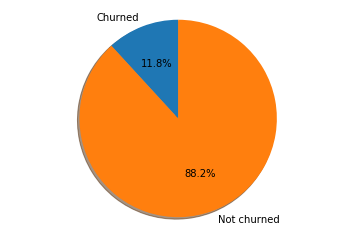

In [267]:
labels = ['Churned', 'Not churned']
fig, ax = plt.subplots()
x = customer_dates[customer_dates['Churn'] == 1]['Churn'].count()
y = customer_dates[customer_dates['Churn'] == 0]['Churn'].count()
ax.pie([x, y], labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')

plt.show()

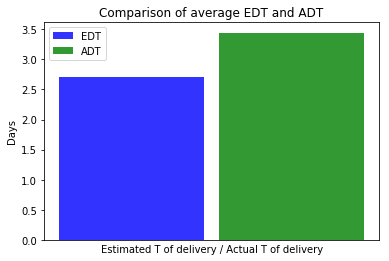

In [268]:
# data to plot
n_groups = 1
mean_edt = customer_dates['EDT'].mean()
mean_adt = customer_dates['ADT'].mean()

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, mean_edt, 0.1,
                 alpha=opacity,
                 color='b',
                 label='EDT')
 
rects2 = plt.bar(index + 0.11, mean_adt, 0.1,
                 alpha=opacity,
                 color='g',
                 label='ADT')
 
plt.xlabel('Estimated T of delivery / Actual T of delivery')
plt.ylabel('Days')
plt.title('Comparison of average EDT and ADT')
plt.tick_params(bottom=False, labelbottom=False)
plt.legend()

plt.show()

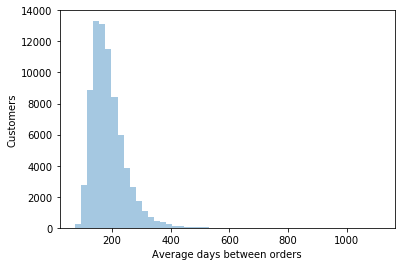

In [269]:
ax = sns.distplot(customer_dates['T_between_orders'], kde=False)
ax.set(xlabel='Average days between orders', ylabel='Customers')
plt.show()

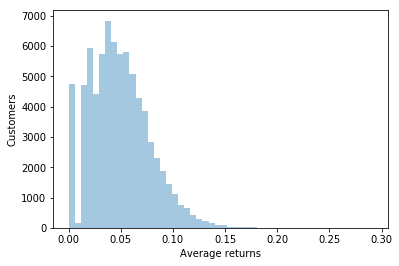

In [270]:
ax = sns.distplot(customer_dates['Average returns'], kde=False)
ax.set(ylabel='Customers')
plt.show()

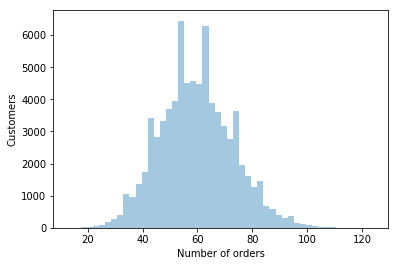

In [271]:
ax = sns.distplot(customer_dates['Number of orders'], kde=False)
ax.set(ylabel='Customers')
plt.show()

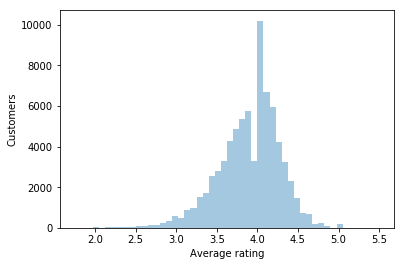

In [272]:
ax = sns.distplot(customer_dates['Average rating'], kde=False, 
                  hist_kws={'range':[1.75,5.5]})
ax.set(ylabel='Customers')
plt.show()

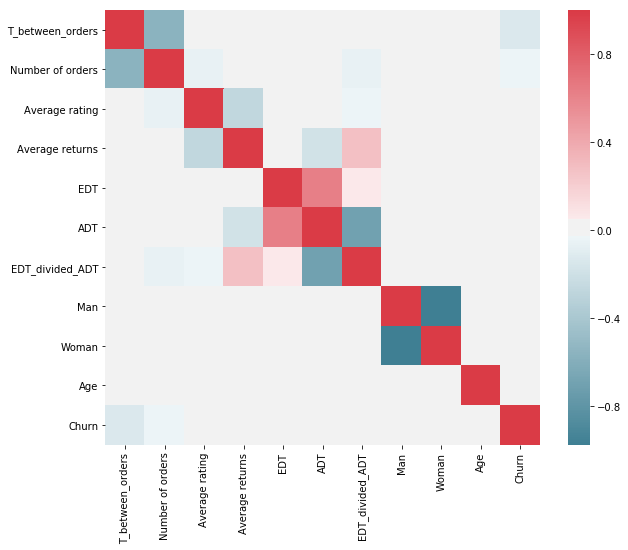

In [276]:
f, ax = plt.subplots(figsize=(10, 8))
corr = customer_dates.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)